In [190]:
# importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import  Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import warnings
from sklearn import set_config
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')
set_config(display='diagram')

In [191]:
# Loading the datasets
iris_data = load_iris(as_frame= True)

iris_df = pd.DataFrame(data=iris_data.data , columns= iris_data.feature_names)
iris_df['target'] = iris_data.target

In [192]:
# Display the loaded dataset
display(iris_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [193]:
# Statistical description of the dataset
display(iris_df.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [194]:
# Displaying the datatypes of the dataset
display(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


None

In [195]:
# Looking for any missing values
missing_values = iris_df.isnull().sum()
print('The total number of missing values in each columns \n{}'.format(missing_values))

The total number of missing values in each columns 
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [196]:
# Dropping the missing values
iris_df = iris_df.dropna()

missing_values = iris_df.isnull().sum()
print('The number of missing values in the column after the drop {}'.format(missing_values))

The number of missing values in the column after the drop sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


### Visualizing the distribution of the Each Features

The features are Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


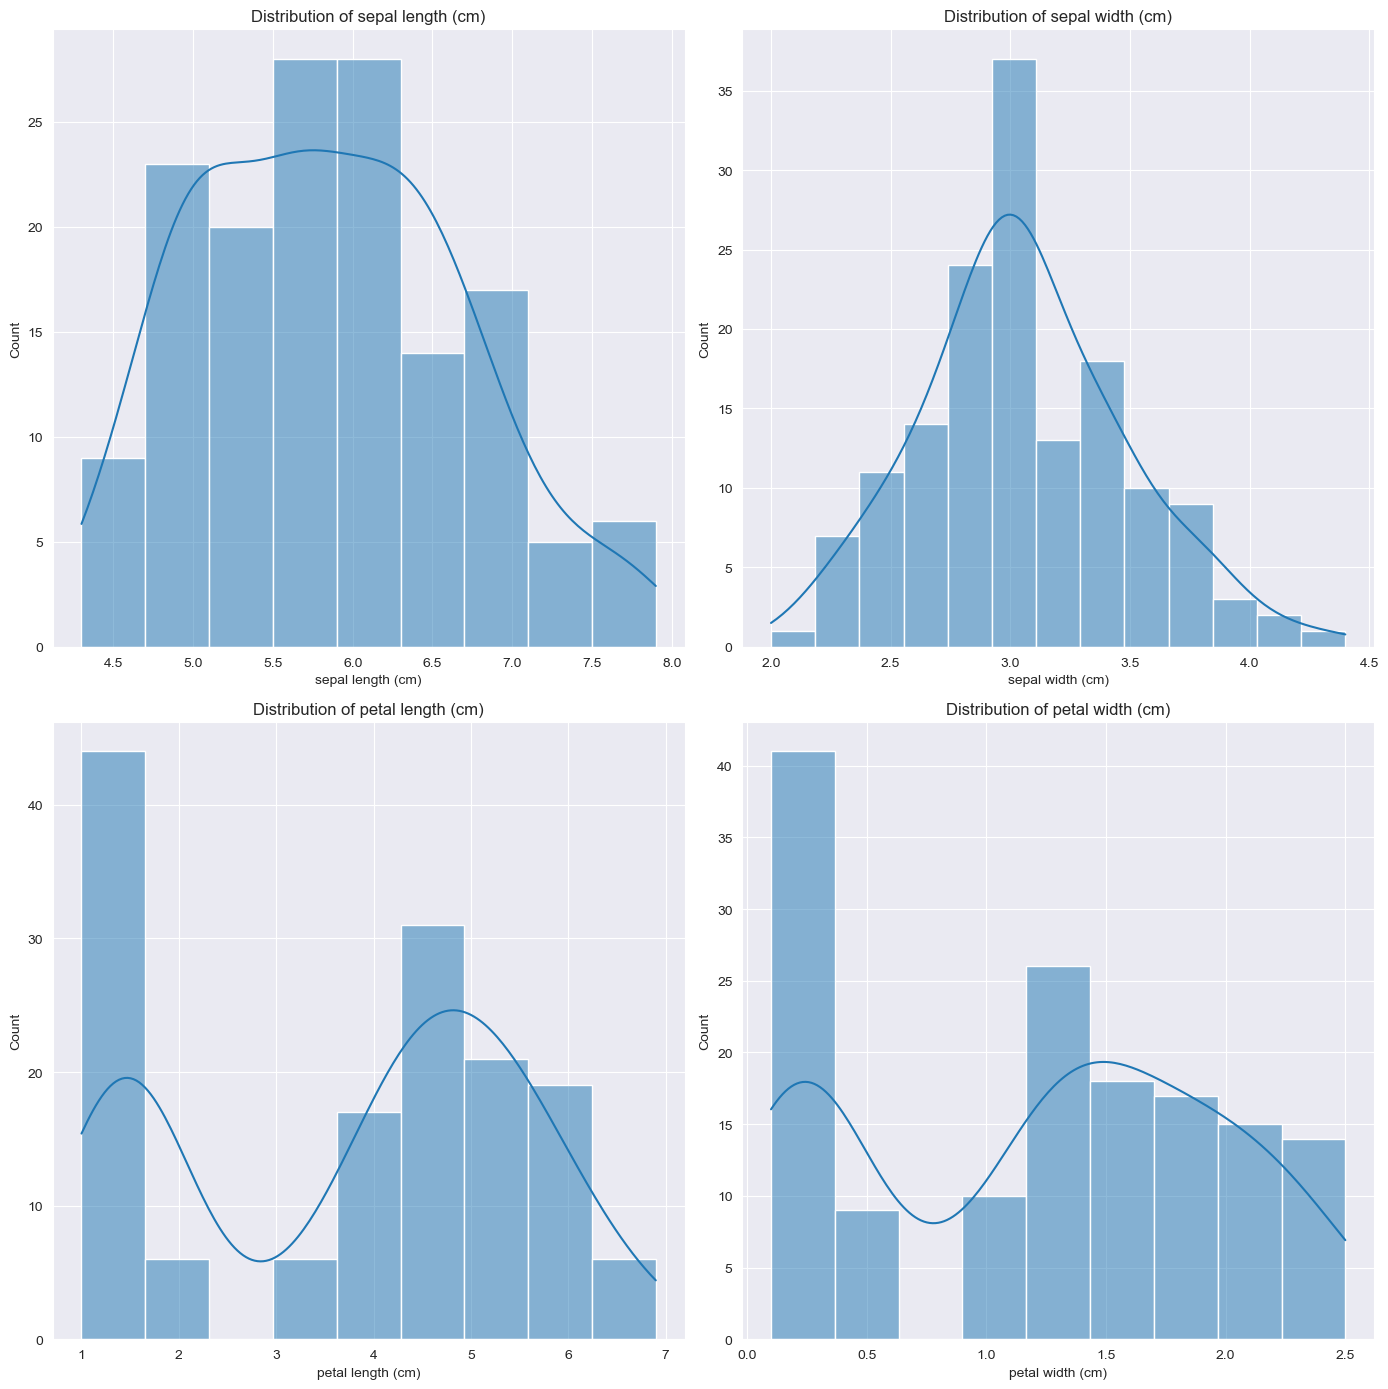

In [197]:
fig, axs = plt.subplots(2,2, figsize = (14,14))

features = iris_df.columns[:-1]
print('The features are {}'.format(features))

for ax, feature in zip(axs.flat, features):
    sns.histplot(data=iris_df[feature], kde=True,ax = ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

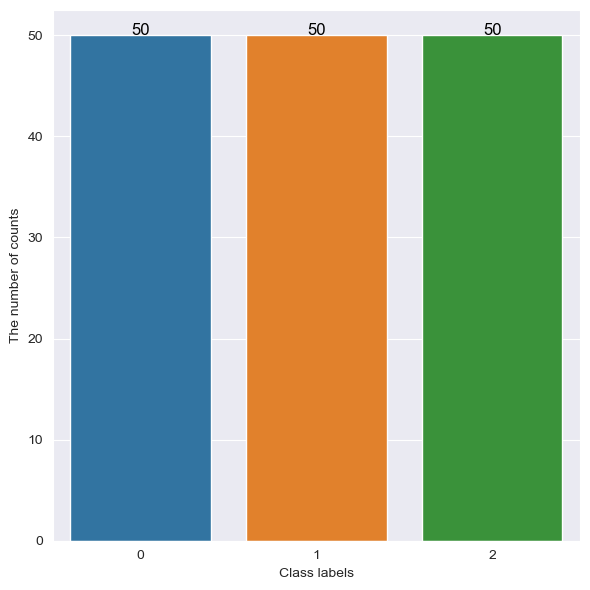

In [198]:
plt.figure(figsize=(6,6))
sns.countplot(data=iris_df, x='target')
plt.xlabel('Class labels')
plt.ylabel('The number of counts')

# Getting the current axis
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2 , p.get_height(), '%d'%int(p.get_height()) , fontsize = 12, color = 'black', ha ='center')

plt.tight_layout()
plt.show()

In [199]:
# Printing the number of different classes
class_counts = iris_df['target'].value_counts()
print(f'The number of different classes are \n{class_counts}')

The number of different classes are 
0    50
1    50
2    50
Name: target, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


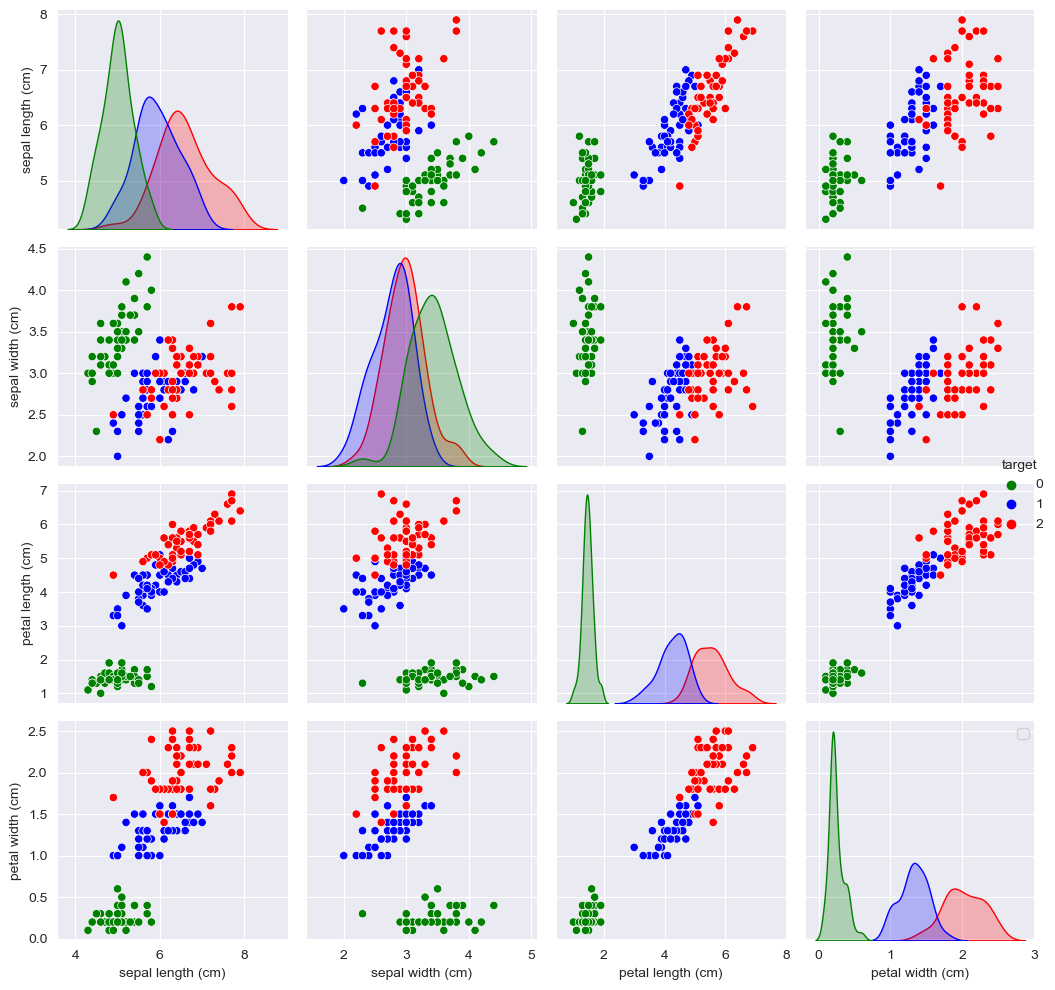

In [216]:
colors = ['green', 'blue','red']
sns.pairplot(data=iris_df,  hue='target', palette=colors)
plt.tight_layout()
plt.legend()
plt.show()

In [200]:
numeric_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
categorical_columns = []

In [201]:
numeric_pipeline = Pipeline(
    steps=[
        ('drop_na', iris_df.dropna(inplace=True)),
        ('standard_scaler', StandardScaler())
    ]
)

categorical_pipeline = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
           ('one_hot', OneHotEncoder())
           ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_pipeline, numeric_columns),
        ('categorical', categorical_pipeline, categorical_columns)
    ]
)

In [202]:
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('drop_na', None),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 ['sepal length (cm)', 'sepal width (cm)',
                                  'petal length (cm)', 'petal width (cm)']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('one_hot', OneHotEncoder())]),
                                 [])])

In [203]:
# Defining the Parameters for GridSearch
parameter_grid = [
    {'model': [SVC()],
     'model__kernel': ['linear', 'poly', 'rbf'],
     'model__degree': [2, 3]
     },

    {
        'model': [DecisionTreeClassifier()]
    },

    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [100, 200, 500],
        'model__criterion': ['gini', 'entropy']

    },

    {
        'model': [XGBClassifier()],
        'model__n_estimators': [100, 500],
        'model__max_depth': [3, 5],
        'model__learning_rate': [0.01, 0.1],
    }

]

In [204]:
# Define the pipeline, with the model step being a placeholder
pipe = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('model', SVC())]
)
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('drop_na',
                                                                   None),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['sepal length (cm)',
                                                   'sepal width (cm)',
                                                   'petal length (cm)',
                                                   'petal width (cm)']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('one_hot',
                                                                   OneHotEncoder())]),
                                                  [])])),
                ('model', SVC())])

In [205]:
grid_search = GridSearchCV(estimator=pipe, cv=5, param_grid=parameter_grid, verbose=1, n_jobs=-1, scoring='accuracy')

In [206]:
X = iris_df.drop(columns='target', axis=1)
Y = iris_df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

In [207]:
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('drop_na',
                                                                                          None),
                                                                                         ('standard_scaler',
                                                                                          StandardScaler())]),
                                                                         ['sepal '
                                                                          'length '
                                                                          '(cm)',
                                                                          'sepal '
                                                                          'width '
                                                                          '(cm)',
                                                                          'petal '
                                                                          'length '
                                                                          '(cm)',
                                                                          'petal '
                                                                          'width '
                                                                          '(cm)']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strateg...
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  n_estimators=100, n_jobs=None,
                                                  num_parallel_tree=None,
                                                  predictor=None,
                                                  random_state=None, ...)],
                          'model__learning_rate': [0.01, 0.1],
                          'model__max_depth': [3, 5],
                          'model__n_estimators': [100, 500]}],
             scoring='accuracy', verbose=1)

In [208]:
results_df = pd.DataFrame(data=grid_search.cv_results_)
display(results_df)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__degree,param_model__kernel,param_model__criterion,param_model__n_estimators,param_model__learning_rate,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009832,0.000879,0.004815,0.000938,SVC(degree=2),2,linear,NaN,NaN,NaN,NaN,"{'model': SVC(degree=2), 'model__degree': 2, '...",0.958333,1.000000,0.833333,1.000000,0.958333,0.950000,0.061237,7
1,0.009957,0.000388,0.004685,0.000737,SVC(degree=2),2,poly,NaN,NaN,NaN,NaN,"{'model': SVC(degree=2), 'model__degree': 2, '...",0.875000,0.875000,0.833333,0.791667,0.791667,0.833333,0.037268,21
2,0.009321,0.001170,0.004905,0.001625,SVC(degree=2),2,rbf,NaN,NaN,NaN,NaN,"{'model': SVC(degree=2), 'model__degree': 2, '...",0.958333,1.000000,0.875000,1.000000,0.958333,0.958333,0.045644,1
3,0.007426,0.000798,0.004512,0.000558,SVC(degree=2),3,linear,NaN,NaN,NaN,NaN,"{'model': SVC(degree=2), 'model__degree': 3, '...",0.958333,1.000000,0.833333,1.000000,0.958333,0.950000,0.061237,7
4,0.007006,0.000707,0.004116,0.000732,SVC(degree=2),3,poly,NaN,NaN,NaN,NaN,"{'model': SVC(degree=2), 'model__degree': 3, '...",0.958333,0.916667,0.916667,0.958333,0.875000,0.925000,0.031180,20
5,0.007420,0.000661,0.005108,0.001326,SVC(degree=2),3,rbf,NaN,NaN,NaN,NaN,"{'model': SVC(degree=2), 'model__degree': 3, '...",0.958333,1.000000,0.875000,1.000000,0.958333,0.958333,0.045644,1
6,0.007620,0.001025,0.003614,0.000590,DecisionTreeClassifier(),NaN,NaN,NaN,NaN,NaN,NaN,{'model': DecisionTreeClassifier()},0.958333,1.000000,0.833333,0.958333,0.958333,0.941667,0.056519,15
7,0.224729,0.005178,0.021451,0.004399,RandomForestClassifier(),NaN,NaN,gini,100,NaN,NaN,"{'model': RandomForestClassifier(), 'model__cr...",0.958333,1.000000,0.875000,1.000000,0.958333,0.958333,0.045644,1
8,0.457861,0.015917,0.033037,0.002950,RandomForestClassifier(),NaN,NaN,gini,200,NaN,NaN,"{'model': RandomForestClassifier(), 'model__cr...",0.958333,0.958333,0.875000,1.000000,0.958333,0.950000,0.040825,7
9,1.086241,0.032636,0.075857,0.001777,RandomForestClassifier(),NaN,NaN,gini,500,NaN,NaN,"{'model': RandomForestClassifier(), 'model__cr...",0.958333,1.000000,0.875000,1.000000,0.958333,0.958333,0.045644,1


In [209]:
print('Best parameter found: {}'.format(grid_search.best_params_))
print('Best estimator found: {}'.format(grid_search.best_estimator_))
print('Best accuracy Score: {}'.format(grid_search.best_score_))

Best parameter found: {'model': SVC(degree=2), 'model__degree': 2, 'model__kernel': 'rbf'}
Best estimator found: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('drop_na',
                                                                   None),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['sepal length (cm)',
                                                   'sepal width (cm)',
                                                   'petal length (cm)',
                                                   'petal width (cm)']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                  

In [210]:
Y_test_pred = grid_search.best_estimator_.predict(X_test)
report = classification_report(y_true=Y_test_pred,y_pred=Y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



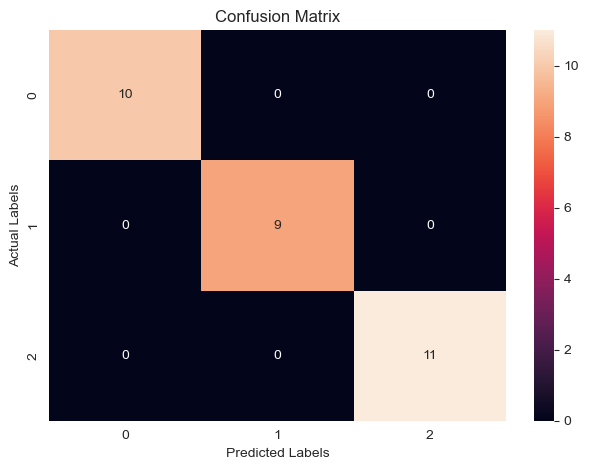

In [211]:
confusion_matrix_result = confusion_matrix(y_true=Y_test_pred,y_pred=Y_test)
sns.heatmap(data = confusion_matrix_result,annot = True)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

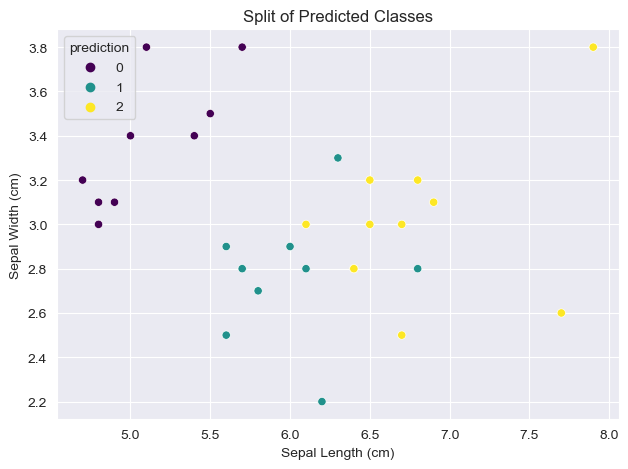

In [221]:
plot_df = X_test
plot_df['prediction'] = Y_test_pred

sns.scatterplot(data=plot_df, x='sepal length (cm)', y='sepal width (cm)',  palette='viridis', hue = 'prediction')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Split of Predicted Classes')
plt.tight_layout()
plt.show()